In [1]:
import pandas as pd
X_data=pd.read_csv('X_data.csv')

In [2]:
y_data=pd.read_csv('Y_data.csv')

In [3]:
X_data.shape

(10000, 10000)

In [4]:
y_data.shape

(10000, 103)

In [7]:
from sklearn.model_selection import train_test_split
t_x,tt_x,t_y,tt_y=train_test_split(X_data,y_data,random_state=1)

In [ ]:
#다중 뉴럴 네트워크/ 앞에 진행된것과 진행될것에 영향을 안줌 foward신경망

In [8]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
m=Sequential()
m.add(Dense(256,input_shape=(10000,),activation='relu'))
m.add(Dropout(0.5))
m.add(Dense(128,activation='relu'))
m.add(Dropout(0.5))
m.add(Dense(103,activation='softmax'))
m.compile(optimizer='adam',loss = 'categorical_crossentropy',
          metrics=['accuracy'])
hy=m.fit(t_x,t_y,epochs=10,validation_data=(tt_x,tt_y))

Epoch 1/10
235/235 [==============================] - 4s 16ms/step - loss: 148.7127 - accuracy: 0.0489 - val_loss: 549.4069 - val_accuracy: 4.0000e-04
Epoch 2/10
235/235 [==============================] - 4s 16ms/step - loss: 2102.3328 - accuracy: 0.0555 - val_loss: 4257.2124 - val_accuracy: 4.0000e-04
Epoch 3/10
235/235 [==============================] - 3s 14ms/step - loss: 8160.7671 - accuracy: 0.0545 - val_loss: 12934.5107 - val_accuracy: 4.0000e-04
Epoch 4/10
235/235 [==============================] - 3s 13ms/step - loss: 19329.5449 - accuracy: 0.0520 - val_loss: 27280.0996 - val_accuracy: 0.1880
Epoch 5/10
235/235 [==============================] - 3s 13ms/step - loss: 35892.0547 - accuracy: 0.0496 - val_loss: 47713.5234 - val_accuracy: 4.0000e-04
Epoch 6/10
235/235 [==============================] - 3s 13ms/step - loss: 59318.7695 - accuracy: 0.0519 - val_loss: 74776.8281 - val_accuracy: 0.1880
Epoch 7/10
235/235 [==============================] - 3s 13ms/step - loss: 87842.3516

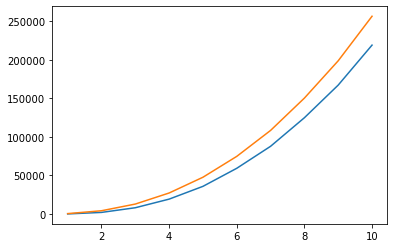

In [9]:
import matplotlib.pyplot as plt
x=range(1,len(hy.history['loss'])+1)
plt.plot(x,hy.history['loss'])
plt.plot(x,hy.history['val_loss'])

In [ ]:
#loss 발산했다란 말은 기울기가 0이되는값을 찾지 못했다
#관련된 요소에서 관련되값을 찾지못하고 
#학습구성에서 1. 모델의 이용에서 옵티마이저 방식이 잘못되어서 2.데이터관련 요소가 알맞지않아서
#softmax는 통합해서 0~1값을 말해줌 / 가장 높은값 확률값 도출=> 유일한 값을 찾을때 사용
